In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10) #隨機生產10個式字

Using TensorFlow backend.


# 資料準備

In [0]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data() #載入input的資料(訓練和測試)

In [3]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


## 正規化

In [0]:
#數據類型轉換
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [0]:
from keras.utils import np_utils
# 透過keras以numpy將函數改為one-hot編碼模式
y_label_train_OneHot = np_utils.to_categorical(y_label_train) 
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [10]:
y_label_test_OneHot.shape
#one-hot模式:0-9之間，現在大小為10的向量，因此屬於那個數字，就在哪個位置上為 1，其他位置上為0

(10000, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [0]:
model = Sequential()

### convolution layer

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [0]:
model.add(Dropout(rate=0.25))

### convolution layer and pooling layer

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling是取最大值

In [0]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [0]:
model.add(Dropout(0.25))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### 建立神經網路(平坦層、隱藏層、輸出層)

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(10, activation='softmax'))

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

### 載入之前的模型

In [23]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew1.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


## 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) #compie來配置學習過程

In [25]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1) 
#model.fit(訓練數據,訓練數據,将訓練的資料當中一部分當作是驗證的資料,訓練的次數,每經歷過多少個sample改weight,輸出[1為進度條])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 148s 4ms/step - loss: 1.5019 - acc: 0.4590 - val_loss: 1.2961 - val_acc: 0.5707
Epoch 2/10
40000/40000 [==============================] - 147s 4ms/step - loss: 1.1454 - acc: 0.5942 - val_loss: 1.1054 - val_acc: 0.6409
Epoch 3/10
40000/40000 [==============================] - 146s 4ms/step - loss: 0.9897 - acc: 0.6521 - val_loss: 1.0264 - val_acc: 0.6589
Epoch 4/10
40000/40000 [==============================] - 146s 4ms/step - loss: 0.8815 - acc: 0.6893 - val_loss: 0.9637 - val_acc: 0.6912
Epoch 5/10
40000/40000 [==============================] - 146s 4ms/step - loss: 0.7908 - acc: 0.7241 - val_loss: 0.8722 - val_acc: 0.7043
Epoch 6/10
40000/40000 [==============================] - 146s 4ms/step - loss: 0.7074 - acc: 0.7509 - val_loss: 0.8514 - val_acc: 0.7154
Epoch 7/10
40000/40000 [==============================] - 146s 4ms/step - loss: 0.6230 - acc: 0.7806 - val_loss: 0.8228 - 

In [0]:
import matplotlib.pyplot as plt
# 繪製精訓練過程
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch') #每個batch更新完的一個參數
    plt.legend(['train', 'test'], loc='upper left')
    plt.show() 

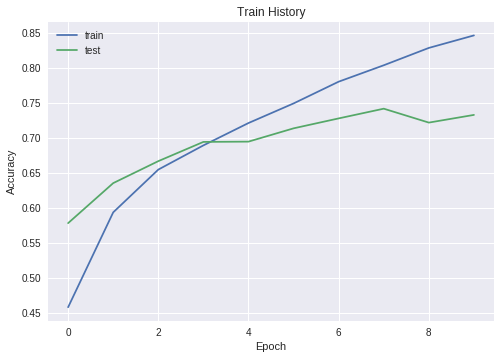

In [25]:
show_train_history('acc','val_acc') #精準度

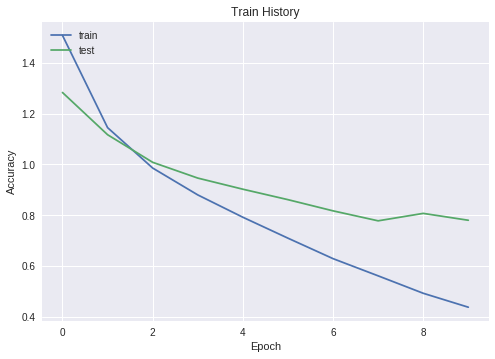

In [26]:
show_train_history('loss','val_loss') #看是否收斂

###  預測模型的準確度

In [27]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.7303

### 進行預測

In [0]:
prediction=model.predict_classes(x_img_test_normalize)

In [29]:
prediction[:10]

array([5, 1, 8, 0, 6, 6, 1, 6, 3, 1])

### 查看預測的結果

In [0]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}  #lable name

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()  #得到當前的圖檔(fugure)
    fig.set_size_inches(12, 14) #set_size_inches(高,寬) 調整圖檔
    if num>25: num=25 
      # 以下也只是單純畫出plt要顯示的圖檔 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
    plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

In [0]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

### 查看預測機率

In [0]:
Predicted_Probability=model.predict(x_img_test_normalize)
#計算樣本的預測 predict(x, batch_size=None, verbose=0, steps=None)
#batchsize:整數預設為32 verbose模式0 or 1 steps:在於預測完成之前的所有訓練步驟

In [0]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2)) #定義圖像的框框
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3))) #顯示出該圖片
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j])) #顯示類別和準確度

label: cat predict: cat


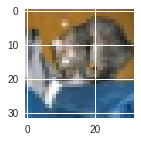

airplane Probability:0.007216769
automobile Probability:0.008793145
bird Probability:0.013464957
cat Probability:0.556062758
deer Probability:0.004713491
dog Probability:0.352950573
frog Probability:0.026314622
horse Probability:0.009076647
ship Probability:0.020018768
truck Probability:0.001388285


In [32]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

In [0]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

### confusin matrix   
混淆矩陣 在人工智慧領域中的分類預測(Classification)來看預測的準確度

In [34]:
prediction.shape

(10000,)

In [35]:
y_label_test.shape

(10000, 1)

In [36]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [37]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [39]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])
#pd.croostab 混淆矩陣的方式，視覺化監督式學習訓練的結果

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,736,9,70,21,20,9,21,6,72,36
1,11,820,14,10,6,7,18,2,27,85
2,41,2,632,27,95,58,103,23,11,8
3,9,11,72,471,78,181,138,22,8,10
4,13,2,67,38,739,26,74,26,12,3
5,7,2,54,120,57,653,63,30,6,8
6,2,2,24,26,20,17,903,2,1,3
7,11,2,32,24,85,74,17,748,4,3
8,27,25,20,13,13,9,16,1,857,19


In [40]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


## 儲存model (格式JSON)

In [0]:
model_json = model.to_json()
with open("cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)


## 儲存model (格式yaml)

In [45]:
model_yaml = model.to_yaml()
with open("SaveModel/cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

FileNotFoundError: ignored

In [0]:
# (!)若遇到''No such file or directory: 'SaveModel/cifarCnnModelnew.yaml'''，因是在此平台執行，因此把前方的SaveModel資料夾拿掉即可 (因為本身沒有建立那個資料夾!)

In [0]:
model_yaml = model.to_yaml()
with open("cifarCnnModelnew.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

## 儲存model (格式h5)

In [47]:
model.save_weights("cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
